# S14T01 - Base de dades NoSQL
Comencem a familiaritzar-nos amb bases de dades NoSQL !!! Comencem amb uns quants exercicis bàsics.

### [NIVELL 1]
## - Exercici 1
Crea una base de dades NoSQL utilitzant MongoDB. Afegeix-li algunes dades d'exemple que et permetin comprovar que ets capaç de processar-ne la informació de manera bàsica.

## - Exercici 2
Connecta la base de dades NoSQL a Python utilitzant per exemple pymongo.
<br><br>
<font color='blue'>For this activity we'll be using a bunch of logistic details about shipments:

In [379]:
import pymongo

myclient = pymongo.MongoClient('mongodb://localhost:27017/')
mydb = myclient['s14t01_database']

#create collection
mycol = mydb["shipments"]

#insert data into collection
data = [
    { 'ID': "1451202", 'Ship_date': '5/5/2022', "Arrival_Date": '5/5/2022',"Scan_ID": 'cvMAF01_SINGLES_03', 'Condition': '4','Process Path': 'PPSingleMedium', 'Sort Code': 'AMZL-DXE1-SD', 'Quantity': 0},
    { 'ID': "3303202", 'Ship_date': '5/5/2022', "Arrival_Date": '5/5/2022',"Scan_ID": 'cvMAF01_SINGLES_03', 'Condition': '4','Process Path': 'PPSingleMedium', 'Sort Code': 'AMZL-DRM4-SD', 'Quantity': 4},
    { 'ID': "7817202", 'Ship_date': '5/5/2022', "Arrival_Date": '5/5/2022',"Scan_ID": 'cvMAF01_SINGLES_02', 'Condition': '4','Process Path': 'PPSingleMedium', 'Sort Code': 'AMZL-DXE1-SD', 'Quantity': 55},
    { 'ID': "6301202", 'Ship_date': '5/5/2022', "Arrival_Date": '5/5/2022','Condition': '15','Process Path': 'PPPickToRebin2', 'Quantity': 9},
    { 'ID': "5355202", 'Ship_date': '5/5/2022', "Arrival_Date": '5/5/2022',"Scan_ID": 'ppAUTOSLAM_LANE_04', 'Condition': '15','Process Path': 'PPAFE1', 'Sort Code': 'AMZL-DXE1-SD', 'Quantity': 2},
    { 'ID': "6301203", 'Ship_date': '5/5/2022', "Arrival_Date": '5/5/2022', 'Condition': '15','Process Path': 'PPPickToRebin2', 'Quantity': 1},
    { 'ID': "2938202", 'Ship_date': '5/5/2022', "Arrival_Date": '5/5/2022', 'Condition': '15','Process Path': 'PPAFE1', 'Sort Code': 'AMZL-DXE1-SD', 'Quantity': 7},
    { 'ID': "5653202", 'Ship_date': '5/5/2022', "Arrival_Date": '5/5/2022',"Scan_ID": 'srAfe1082', 'Condition': '704','Process Path': 'PPAFE1', 'Sort Code': 'AMZL-DXE1-SD', 'Quantity': 4},
    { 'ID': "5653102", 'Ship_date': '5/5/2022', "Arrival_Date": '5/5/2022',"Scan_ID": 'srAfe1082', 'Condition': '704','Process Path': 'PPAFE1', 'Sort Code': 'AMZL-DXE1-SD', 'Quantity': 1}
]

x = mycol.insert_many(data)

 <font color='blue'>We'll start by checking all the databases available:

In [380]:
print("List of Databases: ", myclient.list_database_names())

List of Databases:  ['admin', 'config', 'local', 'mydatabase', 's14t01_database']


<font color='blue'>And there we can see our new database plus the default databases. Now we can dive deeper on our dataset to see the info that we just added:

In [381]:
for x in mycol.find({}, {"_id":0}).limit(5):          # limit the output to 5
    print(x, "\n")

{'ID': '1451202', 'Ship_date': '5/5/2022', 'Arrival_Date': '5/5/2022', 'Scan_ID': 'cvMAF01_SINGLES_03', 'Condition': '0', 'Process Path': 'PPSingleMedium', 'Sort Code': 'AMZL-DXE1-SD', 'Quantity': '0'} 

{'ID': '3303202', 'Ship_date': '5/5/2022', 'Arrival_Date': '5/5/2022', 'Scan_ID': 'cvMAF01_SINGLES_03', 'Condition': '0', 'Process Path': 'PPSingleMedium', 'Sort Code': 'AMZL-DRM4-SD', 'Quantity': '4'} 

{'ID': '7817202', 'Ship_date': '5/5/2022', 'Arrival_Date': '5/5/2022', 'Scan_ID': 'cvMAF01_SINGLES_02', 'Condition': '0', 'Process Path': 'PPSingleMedium', 'Sort Code': 'AMZL-DXE1-SD', 'Quantity': '55'} 

{'ID': '6301202', 'Ship_date': '5/5/2022', 'Arrival_Date': '5/5/2022', 'Condition': '15', 'Process Path': 'PPPickToRebin2', 'Quantity': '9'} 

{'ID': '5355202', 'Ship_date': '5/5/2022', 'Arrival_Date': '5/5/2022', 'Scan_ID': 'ppAUTOSLAM_LANE_04', 'Condition': '15', 'Process Path': 'PPAFE1', 'Sort Code': 'AMZL-DXE1-SD', 'Quantity': '2'} 



<font color='blue'>Let's find those records with <b>'Condition = 4'</b> among our collection, sort them by <b>'Quantity'</b> and finally update them to <b>'Condition = 0'</b>. Then we'll show the collection updated:

In [382]:
#query  (filter rows)
myquery = {"Condition": "4"}
newvalues = {"$set": {"Condition": "0"}}

#update
mycol.update_many(myquery, newvalues)     #in order: filter rows, filter columns, update and limit output

#filter columns  &   sort by Quantity    &  limit output to 5
for x in mycol.find({},{"_id":0}).limit(5).sort("Quantity", 1):
    print(x)
    print("")

{'ID': '1451202', 'Ship_date': '5/5/2022', 'Arrival_Date': '5/5/2022', 'Scan_ID': 'cvMAF01_SINGLES_03', 'Condition': '0', 'Process Path': 'PPSingleMedium', 'Sort Code': 'AMZL-DXE1-SD', 'Quantity': 0}

{'ID': '1451202', 'Ship_date': '5/5/2022', 'Arrival_Date': '5/5/2022', 'Scan_ID': 'cvMAF01_SINGLES_03', 'Condition': '0', 'Process Path': 'PPSingleMedium', 'Sort Code': 'AMZL-DXE1-SD', 'Quantity': 0}

{'ID': '1451202', 'Ship_date': '5/5/2022', 'Arrival_Date': '5/5/2022', 'Scan_ID': 'cvMAF01_SINGLES_03', 'Condition': '0', 'Process Path': 'PPSingleMedium', 'Sort Code': 'AMZL-DXE1-SD', 'Quantity': 0}

{'ID': '1451202', 'Ship_date': '5/5/2022', 'Arrival_Date': '5/5/2022', 'Scan_ID': 'cvMAF01_SINGLES_03', 'Condition': '0', 'Process Path': 'PPSingleMedium', 'Sort Code': 'AMZL-DXE1-SD', 'Quantity': 0}

{'ID': '1451202', 'Ship_date': '5/5/2022', 'Arrival_Date': '5/5/2022', 'Scan_ID': 'cvMAF01_SINGLES_03', 'Condition': '0', 'Process Path': 'PPSingleMedium', 'Sort Code': 'AMZL-DXE1-SD', 'Quantity':

<font color='blue'>Success!</font> <br><br>

### [NIVELL 2]
## - Exercici 1
Carrega algunes consultes senzilles a un Pandas Dataframe. 

In [383]:
## import pandas as pd

x = []
for m in mycol.find():
    x.append(m)

print(x[:1])

[{'_id': ObjectId('6273fe3a094929236eea78d6'), 'ID': '1451202', 'Ship_date': '5/5/2022', 'Arrival_Date': '5/5/2022', 'Scan_ID': 'cvMAF01_SINGLES_03', 'Condition': '0', 'Process Path': 'PPSingleMedium', 'Sort Code': 'AMZL-DXE1-SD', 'Quantity': '0'}]


In [384]:
df = pd.DataFrame(x)     
df = df.iloc[: , 2:]        #eliminem el '_id' de PyMongo
df

,Ship_date,Arrival_Date,Scan_ID,Condition,Process Path,Sort Code,Quantity
0,5/5/2022,5/5/2022,cvMAF01_SINGLES_03,0,PPSingleMedium,AMZL-DXE1-SD,0
1,5/5/2022,5/5/2022,cvMAF01_SINGLES_03,0,PPSingleMedium,AMZL-DRM4-SD,4
2,5/5/2022,5/5/2022,cvMAF01_SINGLES_02,0,PPSingleMedium,AMZL-DXE1-SD,55
3,5/5/2022,5/5/2022,NaN,15,PPPickToRebin2,NaN,9
4,5/5/2022,5/5/2022,ppAUTOSLAM_LANE_04,15,PPAFE1,AMZL-DXE1-SD,2
5,5/5/2022,5/5/2022,NaN,15,PPPickToRebin2,NaN,1
6,5/5/2022,5/5/2022,NaN,15,PPAFE1,AMZL-DXE1-SD,7
7,5/5/2022,5/5/2022,srAfe1082,704,PPAFE1,AMZL-DXE1-SD,4
8,5/5/2022,5/5/2022,srAfe1082,704,PPAFE1,AMZL-DXE1-SD,1
9,5/5/2022,5/5/2022,cvMAF01_SINGLES_03,0,PPSingleMedium,AMZL-DXE1-SD,0


<font color='blue'>Now that the data from the mongoDB collection has been lodad to a Pandas dataframe, let's try to find again the entries with 'Condition 0' that we updated previously, sorted by Quantity too:

In [385]:
x = df.Condition == "0"
df[x].head(5).sort_values(by=['Quantity'])

,Ship_date,Arrival_Date,Scan_ID,Condition,Process Path,Sort Code,Quantity
0,5/5/2022,5/5/2022,cvMAF01_SINGLES_03,0,PPSingleMedium,AMZL-DXE1-SD,0
9,5/5/2022,5/5/2022,cvMAF01_SINGLES_03,0,PPSingleMedium,AMZL-DXE1-SD,0
1,5/5/2022,5/5/2022,cvMAF01_SINGLES_03,0,PPSingleMedium,AMZL-DRM4-SD,4
10,5/5/2022,5/5/2022,cvMAF01_SINGLES_03,0,PPSingleMedium,AMZL-DRM4-SD,4
2,5/5/2022,5/5/2022,cvMAF01_SINGLES_02,0,PPSingleMedium,AMZL-DXE1-SD,55


### [NIVELL 3]
## - Exercici 1
Genera un resum estadístic de la informació que conté la base de dades.<br><br>
<font color='blue'>There are different parameters we can study from our logistic dataset, among which stand out <b>'Condition', 'Process Path'</b> and <b>'Quantity'</b>.

count    306.000000
mean       9.222222
std       16.450312
min        0.000000
25%        1.000000
50%        4.000000
75%        7.000000
max       55.000000
Name: Quantity, dtype: float64
median    4.0
mode    1


C:\Users\pacressa\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(25.0, 0.023, 'std: 16.45')

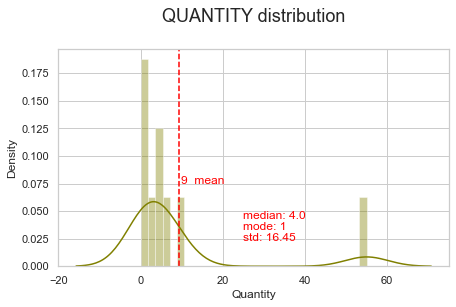

In [386]:
import seaborn as sns
import matplotlib.pyplot as plt

#cleaning the dataframe
list = ["Condition","Quantity"]
x = df["Process Path"]
df = df[list].astype('int')
df["Process Path"] = x


#preparing parameters
mean = df["Quantity"].describe()[1]
mean = df["Quantity"].describe()[1]
std = df["Quantity"].describe()[2]
q1 = df["Quantity"].describe()[4]
median = df["Quantity"].describe()[5]
q3 = df["Quantity"].describe()[6]
mode = df["Quantity"].mode()[0]

print(df["Quantity"].describe())
print("median   ", median)
print("mode   ", mode)


#plotting dataframe
sns.set(style="whitegrid")
ax1 = sns.distplot(df["Quantity"], color="olive")
sns.set(rc={"figure.figsize":(7, 4)})
plt.title("QUANTITY distribution", size=18, y=1.1)

#annotations
plt.axvline(mean, 0 ,1, ls='--', c='red')    # mean
ax1.annotate(str(int(mean))+"  mean", xy=(mean+0.5,0.075), color='red', fontsize=12)
m= "median: "+str(median)
ax1.annotate(m, xy=(q3+18,0.043), color='red')
m= "mode: "+str(mode)
ax1.annotate(m, xy=(q3+18,0.033), color='red')
m= "std: "+str(round(std, 2))
ax1.annotate(m, xy=(q3+18,0.023), color='red')

<font color='blue'>Starting by the Quantity parameter, we can observe that the most common number of occurrences is 1. This means that the majority of shipments had 1 item included. There are some outliers around 60, which moves the mean to the value of 9. We can assure that the distribution of our dataset is normal but very skedwed to the right. <br><br>
Let's figure out how are those units distributed between the categories of 'Condition' and 'Process Path':

<AxesSubplot:xlabel='Process Path'>

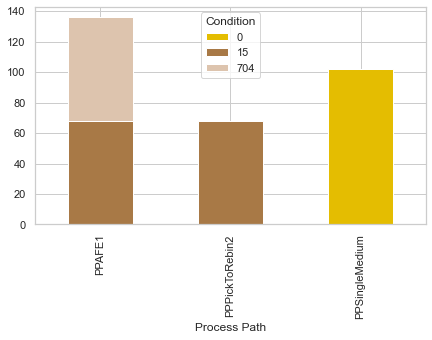

In [394]:
sns.set_style('whitegrid')
pd.crosstab(df["Process Path"], df.Condition).plot.bar(stacked=True, color=["#e4bd01","#a87946","#ddc4ae"])

<font color='blue'>Now we nknow that the most recurrent 'Process Path' in the shipments is <b>PPAFE1</b>, followed by <b>PPSingleMedium</b>. Amongst them, all units in PPSingleMedium are in Condition 0; while PPAFE1 is evenly split between Condition 15 and 704.